# Introduction
On this notebook we will do several things on the mushroom dataset:

1. Run a simple logistic regression
2. Fit a model using random forest classifier
3. Asses the feature importance, and reduce the number of features accordingly
4. Do some visualization

Before we fit the model using logistic regression, we will clean and prepare the data first by using one-hot encoder.

In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Accessing the Data

In [12]:
shroom = pd.read_csv('../desktop/Data Science/mushrooms.csv')
shroom[:]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [13]:
# This loop helps in checking the unique characters in each column 
for feature in shroom.columns:
    print(feature, 'contains', shroom[feature].unique())

class contains ['p' 'e']
cap-shape contains ['x' 'b' 's' 'f' 'k' 'c']
cap-surface contains ['s' 'y' 'f' 'g']
cap-color contains ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises contains ['t' 'f']
odor contains ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment contains ['f' 'a']
gill-spacing contains ['c' 'w']
gill-size contains ['n' 'b']
gill-color contains ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape contains ['e' 't']
stalk-root contains ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring contains ['s' 'f' 'k' 'y']
stalk-surface-below-ring contains ['s' 'f' 'y' 'k']
stalk-color-above-ring contains ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring contains ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type contains ['p']
veil-color contains ['w' 'n' 'o' 'y']
ring-number contains ['o' 't' 'n']
ring-type contains ['p' 'e' 'l' 'f' 'n']
spore-print-color contains ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population contains ['s' 'n' 'a' 'v' 'y' 'c']
habitat contains [

The columns have alphabetic values which cannot be computed. Hence, the next task is to convert these alphabets into numeric values. Also, 'stalk-root' contains null values which need to be eliminated before we proceed.

In [14]:
shroom = shroom.drop(shroom[shroom['stalk-root']=='?'].index)
shroom = shroom.drop('veil-type', axis=1)

In [15]:
#This is done to make sure that no other missing values are present in any other column. If there were null values,
#the sum for the column containing the null value would not be 0.
shroom.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Label Binarizer

In [16]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
for feature in shroom.columns:
    if len(shroom[feature].unique()) == 2:
        shroom[feature] = lb.fit_transform(shroom[feature])

The above cell converts the data from the columns with only 2 distinct alphabets into 0's and 1's.

In [17]:
 for feature in shroom.columns:
    print(feature, ':', shroom[feature].unique())

class : [1 0]
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c']
bruises : [1 0]
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'm']
gill-attachment : [1 0]
gill-spacing : [0 1]
gill-size : [1 0]
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y']
stalk-shape : [0 1]
stalk-root : ['e' 'c' 'b' 'r']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'c' 'y']
veil-color : [0 1]
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'r' 'w']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'l']


# One Hot Encoding

In [18]:
features_onehot = []
for feature in shroom.columns[1:]:
    if len(shroom[feature].unique()) > 2:
        features_onehot.append(feature)
temp = pd.get_dummies(shroom[features_onehot])
shroom = shroom.join(temp)
shroom = shroom.drop(features_onehot, axis=1)
shroom[:3]

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,cap-shape_b,cap-shape_c,cap-shape_f,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0



The above table converts the table into one-hot form. In one hot form, columns having more than two observations are split into multiple columns so that they can be assigned values 0 and 1. 0 being false and 1 being true. 

In [19]:
#This is to verify if all values are in 0 and 1 form so that we can start by training the model. 
#np.unique returns every distinct value present in the shroom dataframe
np.unique(shroom.values)


array([0, 1], dtype=int32)

After confirming that all values are either 0's and 1's, Its time to train split the data into training sets

In [34]:
from sklearn.model_selection import train_test_split

X = shroom.drop('class', axis=1).values
y = shroom['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)


X_train Shape: (3950, 91)
X_test Shape: (1694, 91)
y_train Shape: (3950,)
y_test Shape: (1694,)


After creating the training set, it is used to train the model.
Post training, we test the accuracy of our model.

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Training Accuracy: %.2f%%' % (lr.score(X_train, y_train)*100))
print('Test Accuracy: %.2f%%' % (lr.score(X_test, y_test)*100))

Training Accuracy: 100.00%
Test Accuracy: 100.00%


Whenever accuracy is at a 100% it is wise to get suspecious. So we are going to use a different method to classify the data. 
A Random Forest Classifier fits the data into decision trees and tries to classify it according to pre-specified parameters.

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
mushroom = pd.read_csv('../desktop/Data Science/mushrooms.csv')
shroom2 = mushroom.drop(mushroom[mushroom['stalk-root']=='?'].index)
shroom2[:3]



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


# Label Encoder

Here labelEncoder is use to convert all the non numeric values into numeric.

In [38]:


lbe = LabelEncoder()
for feature in shroom2.columns[1:]:
    shroom2[feature] = lbe.fit_transform(shroom2[feature])
shroom2[:3]


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,e,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,e,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3


In this below cell of code we are splitting the date set since the class feature is the only one that has non-numerical values. So the dataset is split into x which has only the class value and y which has the corresponding charactersitics value for given class value. 

In [42]:
y = shroom2['class'].values
X = shroom2.drop('class', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


After assigning the the training set which is used to train the model, we test the accuracy of our model.

In [25]:

rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
print('Training Score: %.2f%%' % (rfc.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X_test, y_test) * 100))

Training Score: 100.00%
Test Score: 100.00%


# Feature Engineering

Feature engineering is used to identify all the features which are most important to fit the model we are workng on.

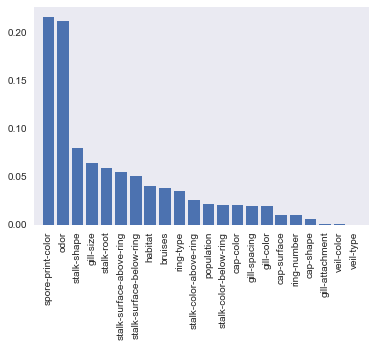

In [26]:
importances = rfc.feature_importances_
features = shroom2.columns[1:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.figure()
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)

Now, looking at the output of the importance function, it is evidant that a lot of datapoints are making a negligable impact on our model, so we have to feature engineer the dateset.

# Results after Feature Engineering

After the feature engineering we use the same two statistical methods to see how feature engineering affected our results.

In [27]:
# random forest
top_features = sorted_features[:2]
y = shroom2['class'].values
X = shroom2[top_features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
print('Random Forest with 2 features')
print('Training Score: %.2f%%' % (rfc.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X_test, y_test) * 100))

Random Forest with 2 features
Training Score: 99.75%
Test Score: 99.65%


In [28]:
# logistic regression
top_features_2 = [
    'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', # feature 1
    'spore-print-color_h', 'spore-print-color_k','spore-print-color_n', # feature 2
    'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
]
y = shroom['class'].values
X = shroom[top_features_2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression with 2 features')
print('Training Accuracy: %.4f%%' % (lr.score(X_train, y_train)*100))
print('Test Accuracy: %.4f%%' % (lr.score(X_test, y_test)*100))

Logistic Regression with 2 features
Training Accuracy: 99.7468%
Test Accuracy: 99.6458%


# Results after using one Feature

As a test we wanted to see the difference by using one feature and two features. The difference can be seen in the results.

In [29]:
# random forest using only one feature
top_features = sorted_features[:1]
y = shroom2['class'].values
X = shroom2[top_features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
print('Random Forest with 1 feature')
print('Training Score: %.2f%%' % (rfc.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (rfc.score(X_test, y_test) * 100))

Random Forest with 1 feature
Training Score: 91.11%
Test Score: 91.20%


In [30]:
# logistic regression using only one feature
top_features_2 = [
    'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', # feature 1
]
y = shroom['class'].values
X = shroom[top_features_2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression with 1 feature')
print('Training Accuracy: %.2f%%' % (lr.score(X_train, y_train)*100))
print('Test Accuracy: %.2f%%' % (lr.score(X_test, y_test)*100))

Logistic Regression with 1 feature
Training Accuracy: 98.43%
Test Accuracy: 98.47%


# Visualization

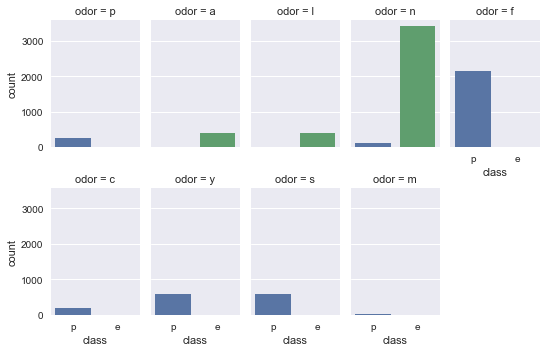

In [31]:
sns.factorplot('class', col='odor', data=mushroom, kind='count', size=2.5, aspect=0.6, col_wrap=5);

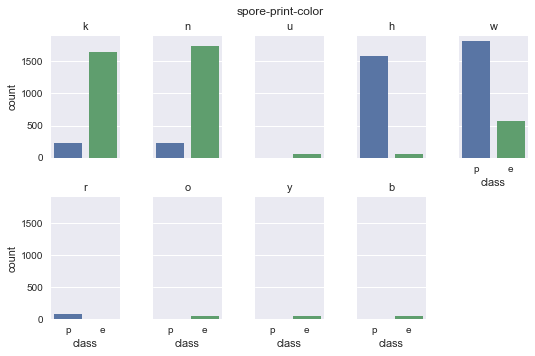

In [32]:
g = sns.factorplot('class', col='spore-print-color', data=mushroom,
               kind='count', size=2.5, aspect=0.6, col_wrap=5)
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('spore-print-color');

 Looking at the above plots we can distinguish the poisonous mushroom from edible mushrooms pretty accurately only based on the odor and spore-print-color